# Q1.1 – Explore the dataset’s features, distributions, and labels

=== HEAD of train_val_split ===


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0



=== INFO of train_val_split ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB

=== DESCRIPTIVE STATISTICS (NUMERIC COLUMNS) ===


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.00000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.523161,132.06267,197.588556,0.232970,136.167575,0.873978,0.542234
std,9.421110,18.61849,108.979439,0.423012,25.334552,1.082222,0.498553
min,29.000000,0.00000,0.000000,0.000000,60.000000,-2.000000,0.000000
25%,47.000000,120.00000,172.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.00000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.00000,267.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.00000,529.000000,1.000000,195.000000,6.200000,1.000000



=== TARGET VALUE COUNTS ===
HeartDisease
1    398
0    336
Name: count, dtype: int64


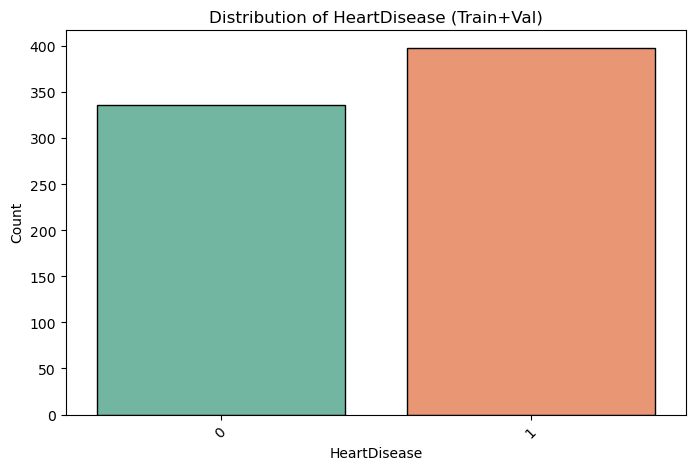


Numeric Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


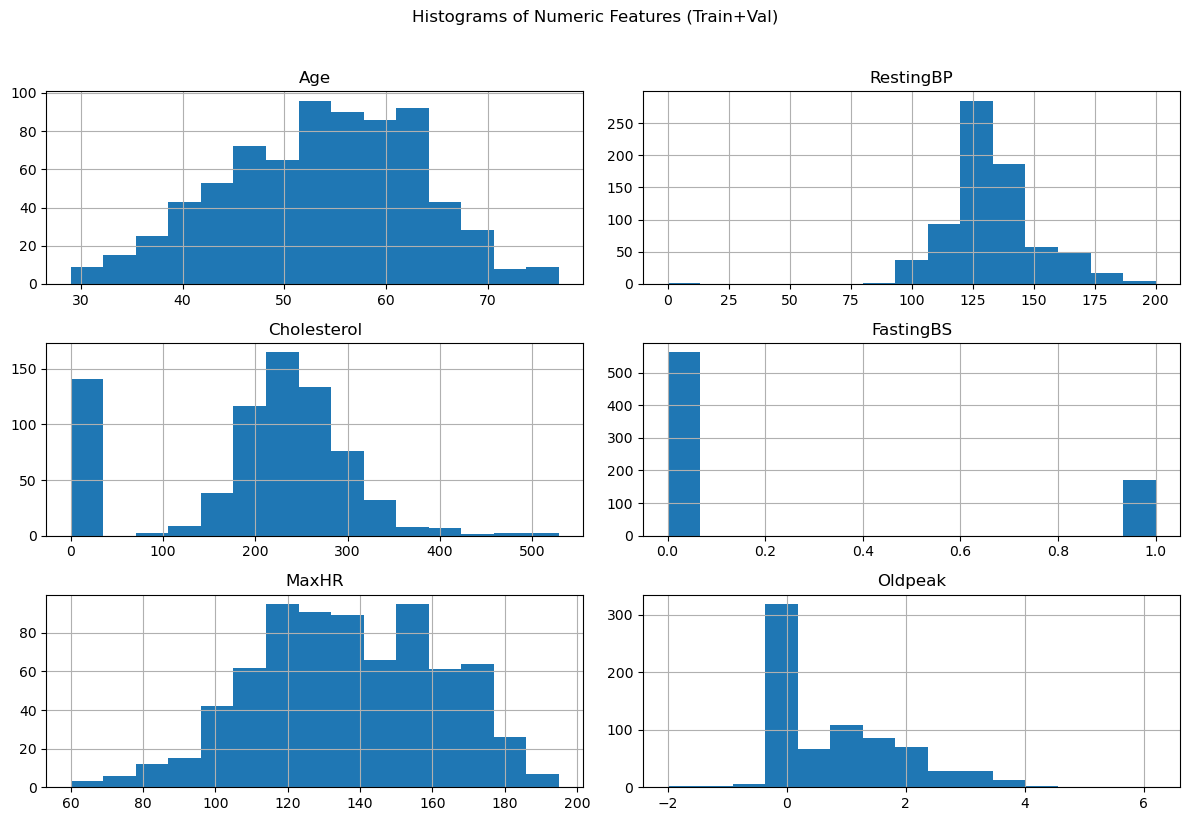

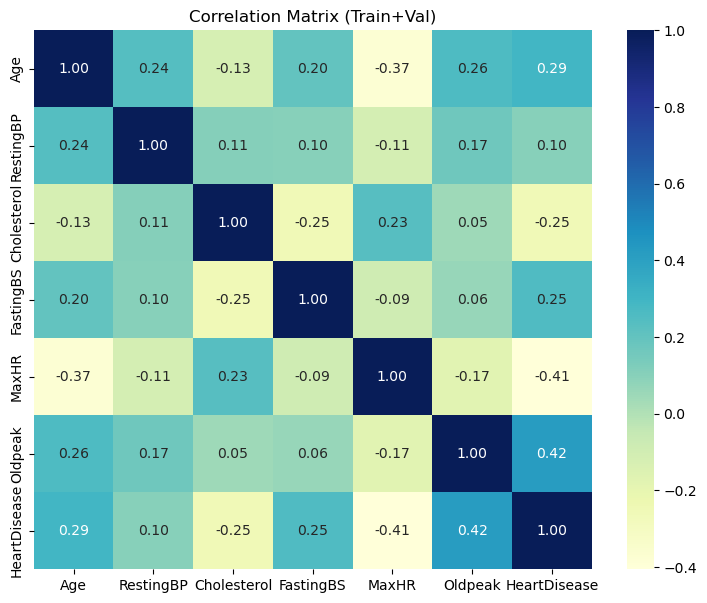


[INFO] Basic EDA for Numeric Columns complete.

=== Object (Categorical) Columns ===
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Column 'Sex' - Unique Values (Count=2): ['M' 'F']
Sex
M    573
F    161
Name: count, dtype: int64

Column 'ChestPainType' - Unique Values (Count=4): ['ATA' 'ASY' 'NAP' 'TA']
ChestPainType
ASY    381
NAP    169
ATA    151
TA      33
Name: count, dtype: int64

Column 'RestingECG' - Unique Values (Count=3): ['Normal' 'ST' 'LVH']
RestingECG
Normal    440
LVH       149
ST        145
Name: count, dtype: int64

Column 'ExerciseAngina' - Unique Values (Count=2): ['N' 'Y']
ExerciseAngina
N    439
Y    295
Name: count, dtype: int64

Column 'ST_Slope' - Unique Values (Count=3): ['Up' 'Flat' 'Down']
ST_Slope
Flat    364
Up      322
Down     48
Name: count, dtype: int64


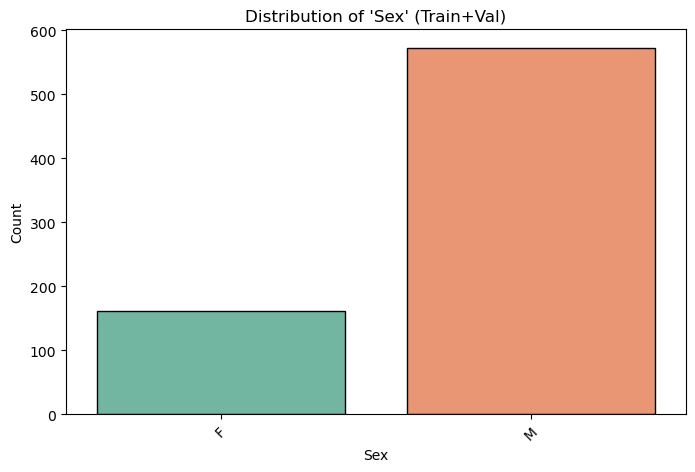

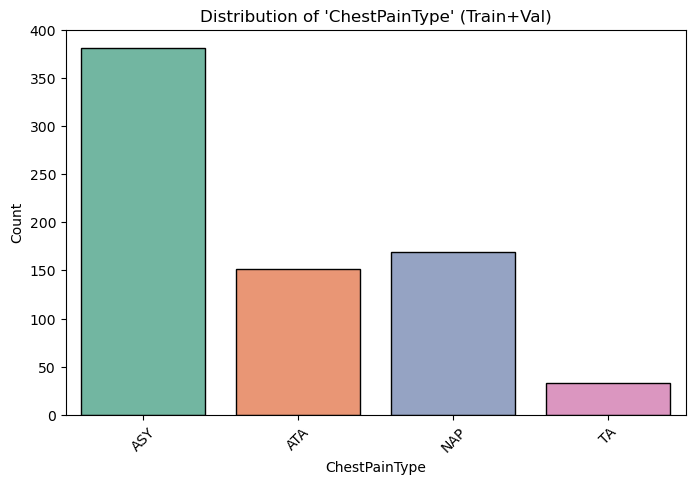

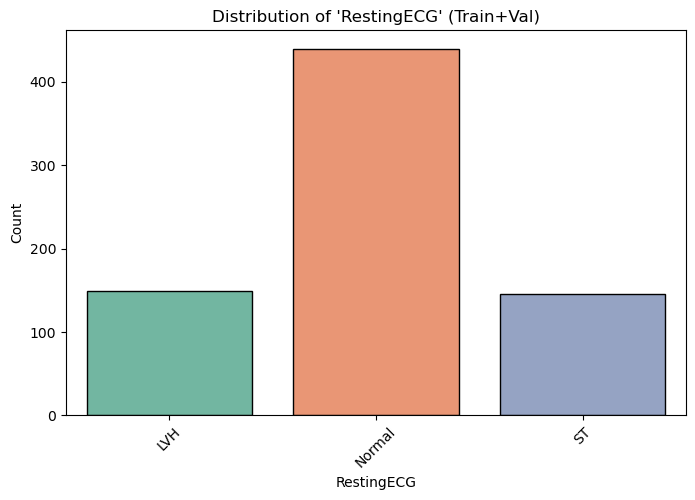

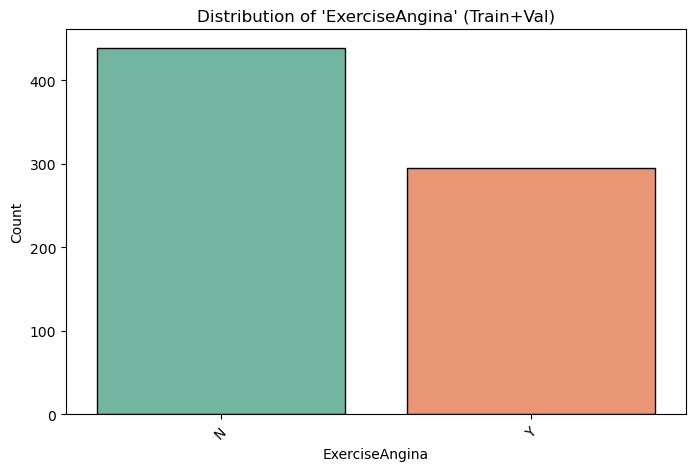

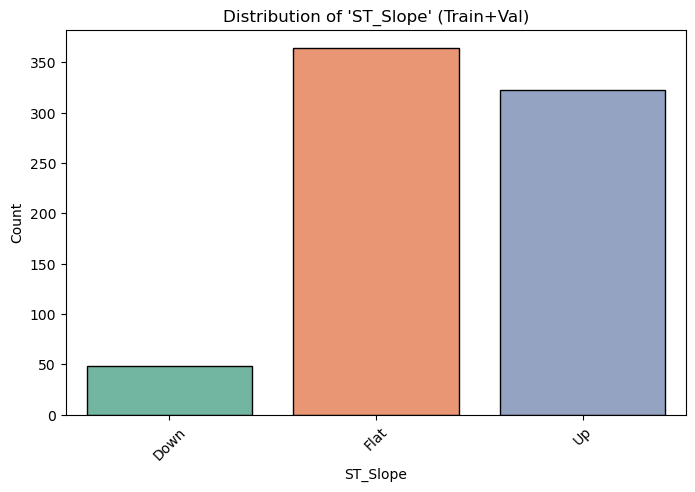


[INFO] EDA for Object Columns complete. All figures saved in 'Q1 FIGURES' folder.


In [1]:
# =====================================================
# Q1.1 - Explore the dataset's features, distributions,
#        and labels (for train+val split), including
#        object-type columns (categorical), while
#        avoiding Seaborn future warnings for palette usage
# =====================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.display import display   # for Jupyter notebooks

# -----------------------------------------------------
# Global Matplotlib settings (bigger default plot size)
# -----------------------------------------------------
plt.rcParams["figure.figsize"] = (8, 5)

# -----------------------------------------------------
# 1) Create a folder named "Q1 FIGURES" for saving plots
# -----------------------------------------------------
os.makedirs("Q1 FIGURES", exist_ok=True)

# -----------------------------------------------------
# 2) Load the TRAIN+VAL data
# -----------------------------------------------------
df_trainval = pd.read_csv("train_val_split.csv")

print("=== HEAD of train_val_split ===")
display(df_trainval.head())

print("\n=== INFO of train_val_split ===")
df_trainval.info()

print("\n=== DESCRIPTIVE STATISTICS (NUMERIC COLUMNS) ===")
display(df_trainval.describe())

# -----------------------------------------------------
# Helper: warning‑free bar plot
# -----------------------------------------------------
def barplot_no_warning(counts: pd.Series,
                       title: str,
                       x_label: str,
                       file_name: str) -> None:
    """
    Draws a bar plot with a custom palette *without* Seaborn's
    "palette without hue" FutureWarning.

    Parameters
    ----------
    counts : pd.Series
        Index = category labels, Values = counts.
    title : str
        Figure title.
    x_label : str
        Name of the categorical variable (also used for hue).
    file_name : str
        Where to save the figure.
    """
    # -- Convert to a small DataFrame Seaborn can reference --
    plot_df = counts.reset_index()
    plot_df.columns = [x_label, "Count"]

    # -- One distinct colour per category --
    n_cat = len(plot_df)
    palette = sns.color_palette("Set2", n_cat)

    # -- Draw the bar plot *with* hue and *without* legend --
    ax = sns.barplot(
        data=plot_df,
        x=x_label,
        y="Count",
        hue=x_label,          # satisfies the new Seaborn API
        palette=palette,
        legend=False,
        edgecolor="black"
    )

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Count")
    plt.xticks(rotation=45)

    plt.savefig(file_name, dpi=120, bbox_inches="tight")
    plt.show()

# -----------------------------------------------------
# 3) Distribution of Target (HeartDisease)
# -----------------------------------------------------
target_col = "HeartDisease"
print("\n=== TARGET VALUE COUNTS ===")
print(df_trainval[target_col].value_counts())

target_counts = df_trainval[target_col].value_counts().sort_index()

barplot_no_warning(
    counts    = target_counts,
    title     = "Distribution of HeartDisease (Train+Val)",
    x_label   = target_col,
    file_name = "Q1 FIGURES/heartdisease_distribution.png"
)

# -----------------------------------------------------
# 4) Distributions of NUMERIC Features
# -----------------------------------------------------
numeric_cols = df_trainval.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(target_col)  # remove target from numeric features

print(f"\nNumeric Columns: {numeric_cols}")

# Histograms for numeric features
df_trainval[numeric_cols].hist(bins=15, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features (Train+Val)", y=1.02)

plt.tight_layout()
plt.savefig("Q1 FIGURES/histograms_numeric_features.png", dpi=120, bbox_inches="tight")
plt.show()

# -----------------------------------------------------
# 5) Correlation Matrix (numeric only)
# -----------------------------------------------------
corr_matrix = df_trainval.corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix (Train+Val)")

plt.savefig("Q1 FIGURES/correlation_matrix.png", dpi=120, bbox_inches="tight")
plt.show()

print("\n[INFO] Basic EDA for Numeric Columns complete.")

# -----------------------------------------------------
# 6) Explore OBJECT-type Columns (Categorical / String)
# -----------------------------------------------------
object_cols = df_trainval.select_dtypes(include=["object"]).columns.tolist()
print("\n=== Object (Categorical) Columns ===")
print(object_cols)

# 6.a) Print unique values for each object column
for col in object_cols:
    unique_vals = df_trainval[col].unique()
    print(f"\nColumn '{col}' - Unique Values (Count={len(unique_vals)}): {unique_vals}")
    print(df_trainval[col].value_counts())

# 6.b) Generate barplots for each object column
for col in object_cols:
    cat_counts = df_trainval[col].value_counts().sort_index()
    barplot_no_warning(
        counts    = cat_counts,
        title     = f"Distribution of '{col}' (Train+Val)",
        x_label   = col,
        file_name = f"Q1 FIGURES/distribution_{col}.png"
    )

print("\n[INFO] EDA for Object Columns complete. All figures saved in 'Q1 FIGURES' folder.")

## Q 1.1 – Feature & Label Exploration (plots attached above)

narrative summary of what we learned from the histograms, bar‑plots, and heat‑map produced in the *EDA > Q1 FIGURES* folder.

###  Label (`HeartDisease`)
* **398 positives (54 %) vs 336 negatives (46 %)** – only mild class imbalance, so accuracy‐based metrics are still informative, but we will report balanced accuracy/F1 and use stratified splits.

###  Numeric features
| Feature | Typical range / shape | Notable points |
|---------|----------------------|----------------|
| `Age`           | 29 – 77 yrs, roughly bell‑shaped around 54 yrs | No obvious outliers. |
| `RestingBP`     | 80 – 200 mm Hg, but **50 zeros** | Zeros are placeholders for “missing” (see Q1.2). |
| `Cholesterol`   | 70 – 603 mg/dl with a long right tail; **170 zeros** spike | Right‑skewed; extreme values > 500 mg/dl are rare outliers. |
| `MaxHR`         | 60 – 202 bpm, unimodal around 150 bpm | No zeros, clean distribution. |
| `Oldpeak`       | Mass at 0 mm + long right‑tail up to 6.2 mm; **9 negative values** | 0 mm indicates no ST‑depression; negatives are entry errors. |

*The correlation heat‑map shows the expected clinical relationships:*  
`Oldpeak` ↑ correlates with `HeartDisease=1`, while `MaxHR` ↓ tends to co‑occur with disease.

###  Categorical features
| Column | Modal category (share) | Additional observations |
|--------|-----------------------|-------------------------|
| `Sex`              | **Male 78 %** | Gender split is skewed toward males, reflecting typical cardiology cohorts. |
| `ChestPainType`    | **ASY (52 %)** – asymptomatic pain | Rare level **TA (4 %)** is present. |
| `RestingECG`       | **Normal (60 %)** | “LVH” and “ST” each ≈ 20 %. |
| `ExerciseAngina`   | **No (60 %)** | Binary – will keep as 0/1. |
| `ST_Slope`         | **Flat (50 %)**, **Up (44 %)**, **Down (6 %)** | Rare “Down” may be shrunk by regularisation. |

Overall, the dataset combines a **mix of numeric vitals plus five categorical descriptors**, with mostly fair category proportions except for a few rare levels (TA chest pain, Down slope). The mild label imbalance and small number of physiologically impossible zeros guide the cleaning choices documented in Q 1.2.

# Q1.2 – Check for Pitfalls (Missing Data, Outliers, Class Imbalance)

### DETECTING IF CUPLICATES IN DATA - WE WANT TO AVOID BIAS

In [2]:
# ------------------------------------------------------
# IDENTIFY exact duplicate rows (across *all* columns)
# ------------------------------------------------------
dup_mask          = df_trainval.duplicated(keep=False)   # True for every row that has a twin
n_duplicates      = dup_mask.sum()                       # total rows that are duplicates
n_duplicate_sets  = df_trainval.duplicated().sum()       # number of *extra* rows beyond the first

print(f"Total rows that participate in a duplicate: {n_duplicates}")
print(f"Of those, {n_duplicate_sets} are redundant copies (will be dropped later).")

# ------------------------------------------------------
# Compact summary: how many times does each duplicate occur?
# ------------------------------------------------------
summary = (
    df_trainval[dup_mask]
    .value_counts()
    .rename("Count")
    .reset_index()
    .sort_values("Count", ascending=False)
)

print("\n=== Duplicate patterns (top 10) ===")
display(summary.head(10))          # for notebooks; use print() if in script

# ------------------------------------------------------
# Full dataframe of *all* duplicate rows (optional deep dive)
# ------------------------------------------------------
dup_rows_df = df_trainval[dup_mask].sort_values(list(df_trainval.columns))
# display(dup_rows_df)   # uncomment in a notebook

Total rows that participate in a duplicate: 0
Of those, 0 are redundant copies (will be dropped later).

=== Duplicate patterns (top 10) ===


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Count


## Exploratory Data Analysis – Data‑Quality Findings & Cleaning Plan

### 1 · Numeric data quality

| Feature | Observation from distribution | Why it’s nonsensical / risky | Planned fix |
|---------|------------------------------|------------------------------|-------------|
| **RestingBP** (mm Hg) | Spike at **0 mm Hg** (~50 rows) | 0 mm Hg is physiologically impossible → “not recorded” | `0 → NaN` → **impute (median _or_ KNN k = 5)** |
| **Cholesterol** (mg/dl) | • Large spike at **0 mg/dl** (~170 rows)<br>• Long right‑tail up to ≈ 600 mg/dl | 0 mg/dl impossible → missing<br>Extreme tail can distort linear coefficients | `0 → NaN` → **impute (median _or_ KNN)** |
| **Oldpeak** (ST‑depression) | Valid mass at 0; **9 negatives** | Metric is defined ≥ 0; negatives are entry errors | negatives → `NaN` → **impute (median _or_ KNN)** (keep real zeros) |
| **MaxHR** (bpm) | Range 60 – 202; no zeros or extremes | All values physiological | *No imputation needed* (still scale later) |
| **Age** | 29 – 77 yrs, slight right skew | Normal cohort spread | Scale only |
| **Duplicates** | *None detected* | — | No action required |

### 2 · Categorical proportions & encoding plan

| Column | Categories (count, %) | Action |
|--------|----------------------|--------|
| **HeartDisease** | 1 = 398 (54 %) • 0 = 336 (46 %) | Mild imbalance → stratified split + balanced metrics; `class_weight="balanced"` for linear models |
| **Sex** | M = 573 (78 %) • F = 161 (22 %) | One‑hot (`Sex_F`) |
| **ChestPainType** | ASY = 381 (52 %) • NAP = 169 (23 %) • ATA = 151 (21 %) • TA = 33 (4 %) | One‑hot; let L1 regularisation handle rare **TA** (4 %) |
| **RestingECG** | Normal = 440 (60 %) • LVH = 149 (20 %) • ST = 145 (20 %) | One‑hot |
| **ExerciseAngina** | N = 439 (60 %) • Y = 295 (40 %) | Already binary; keep as 0/1 |
| **ST_Slope** | Flat = 364 (50 %) • Up = 322 (44 %) • Down = 48 (6 %) | One‑hot; rare **Down** kept—regularisation will shrink it if uninformative |

### 3 · Rationale

* **Missing / nonsensical values** – convert impossible numbers to `NaN` so the model cannot learn “0 ⇒ low risk” artefacts.  
* **Imputation options**  
  * **Median** – fast, robust, coefficient‑friendly.  
  * **KNN (k = 5)** – leverages correlations among vitals (e.g. RestingBP ↔ Age).  
  We will grid‑search both and keep whichever gives the best cross‑validated performance.  
* **Outliers** – Cholesterol has a long right tail; we will *monitor* it but not clip in preprocessing to preserve raw signal.  
* **Class imbalance** – mild; handled with stratified splits and `class_weight="balanced"`.  
* **Categoricals** – one‑hot encoded (`drop_first=True` to avoid the dummy trap). Rare levels remain but are down‑weighted by L1/L2 if not predictive.

### 4 · Cleaning pipeline (overview)

1. **Duplicates** – none found.  
2. **`NaN` conversion** – apply the rules in table 1.  
3. **Numeric imputation**  
   * Default: **KNN** (`n_neighbors = 5`, after `StandardScaler`)  
   * Alternative: **median** (for ablation / robustness check)  
4. **Categorical imputation & encoding** – mode‑impute any categorical `NaN`s, then one‑hot encode; keep binary flags as 0/1.  
5. **Scaling** – standardise numeric columns **after** the train/validation split.  

This workflow satisfies **Q 1.2** by addressing **missing data, nonsensical entries, unusual distributions, and class imbalance**, producing a clean, clinically sensible dataset ready for Logistic‑Lasso, SHAP‑MLP, and NAM modelling.

# Q 1.3 – Pre‑processing pipeline used in all subsequent tasks

In [4]:
# =========================================================
# Q 1.3 · RAW ➜ CLEAN ➜ FIT & SAVE PREPROCESSOR
#      (Scale → KNNImputer → Clip in scaled coords → Unscale → Final scale)
# =========================================================

import pandas as pd
import numpy as np
if not hasattr(np, "int"):
    np.int = int   
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, balanced_accuracy_score

from skopt import BayesSearchCV
from skopt.space import Integer

RAW_CSV   = "train_val_split.csv"
PREP_PATH = "preprocessor.pkl"
SEED      = 42

# ---------------------------------------------------------
# 1) LOAD + HARD-CLEAN IMPOSSIBLE RAW NUMBERS
# ---------------------------------------------------------
df_raw = pd.read_csv(RAW_CSV)

def clean_raw(df):
    """
    1) Drop duplicates
    2) Replace impossible numeric values with NaN:
       - RestingBP=0   -> NaN
       - Cholesterol=0 -> NaN
       - Oldpeak<0     -> NaN
    """
    df = df.drop_duplicates().copy()
    df.loc[df["RestingBP"]   == 0, "RestingBP"]   = np.nan
    df.loc[df["Cholesterol"] == 0, "Cholesterol"] = np.nan
    df.loc[df["Oldpeak"]     <  0, "Oldpeak"]     = np.nan
    return df

df = clean_raw(df_raw)

# ---------------------------------------------------------
# 2) STRATIFIED 80/20 TRAIN–VAL SPLIT
# ---------------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns=["HeartDisease"]),
    df["HeartDisease"],
    test_size=0.20,
    stratify=df["HeartDisease"],
    random_state=SEED
)

# ---------------------------------------------------------
# 3) COLUMN GROUPS
# ---------------------------------------------------------
NUM_COLS = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
CAT_COLS = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# ---------------------------------------------------------
# 4) CUSTOM TRANSFORMER: Scale + KNN + Clip in scaled coords + inverse
# ---------------------------------------------------------
class KNNAndScaledBounds(BaseEstimator, TransformerMixin):
    """
    A single custom transformer to:
      1) scale data for KNN-imputation
      2) KNN-impute in scaled space
      3) clip columns in scaled space to correspond to real-world minima
      4) inverse-scale back to real units

    Then the pipeline can do a final scaling step afterwards if desired.

    Expects:
      - n_neighbors: the K for KNNImputer (tunable)
      - raw_min_dict: {col_idx -> raw_min_value}
        e.g. {1: 50, 2: 70, 4: 0} for RestingBP≥50, Cholesterol≥70, Oldpeak≥0
    """

    def __init__(self, n_neighbors=5, raw_min_dict=None):
        """
        n_neighbors: default 5
        raw_min_dict: dict, e.g. {1:50, 2:70, 4:0}
        """
        self.n_neighbors = n_neighbors
        self.raw_min_dict = raw_min_dict or {1: 50, 2: 70, 4: 0}

    def fit(self, X, y=None):
        # Store shape info
        self.n_features_ = X.shape[1]

        # 1) Fit scaler
        self.scaler_ = StandardScaler()
        X_scaled = self.scaler_.fit_transform(X)

        # 2) Fit KNNImputer on scaled data
        self.imputer_ = KNNImputer(n_neighbors=self.n_neighbors)
        self.imputer_.fit(X_scaled)

        # 3) Precompute scaled_min for each col in raw_min_dict
        self.scaled_min_ = {}
        for idx, raw_min_val in self.raw_min_dict.items():
            mean_ = self.scaler_.mean_[idx]
            scale_ = self.scaler_.scale_[idx]
            zmin = (raw_min_val - mean_) / scale_
            self.scaled_min_[idx] = zmin

        return self

    def transform(self, X, y=None):
        # Sanity check
        if X.shape[1] != self.n_features_:
            raise ValueError("Number of features in transform != fit")

        # 1) Scale
        X_scaled = self.scaler_.transform(X)

        # 2) KNN-impute in scaled coords
        X_scaled_imputed = self.imputer_.transform(X_scaled)

        # 3) Clip in scaled coords
        for idx, zmin in self.scaled_min_.items():
            X_scaled_imputed[:, idx] = np.clip(X_scaled_imputed[:, idx], zmin, None)

        # 4) Inverse-scale -> real units
        X_real = self.scaler_.inverse_transform(X_scaled_imputed)
        return X_real

# ---------------------------------------------------------
# 5) NUMERIC PIPELINE
#    Steps:
#      - KNNAndScaledBounds: scale -> KNN -> scaled-clip -> unscale
#      - final_scaler: final z-score for the model
# ---------------------------------------------------------
numeric_pipe = Pipeline([
    ("knn_bounds",   KNNAndScaledBounds(n_neighbors=5, raw_min_dict={1:50, 2:70, 4:0})),
    ("final_scaler", StandardScaler())
])

# ---------------------------------------------------------
# 6) CATEGORICAL PIPELINE
# ---------------------------------------------------------
categorical_pipe = Pipeline([
    ("mode_imp", SimpleImputer(strategy="most_frequent")),
    ("onehot",   OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# ---------------------------------------------------------
# 7) COMBINED COLUMNTRANSFORMER
# ---------------------------------------------------------
preprocessor = ColumnTransformer([
    ("num", numeric_pipe, NUM_COLS),
    ("cat", categorical_pipe, CAT_COLS)
])

# ---------------------------------------------------------
# 8) DUMMY CLASSIFIER (for CV scoring)
# ---------------------------------------------------------
dummy_logreg = LogisticRegression(
    penalty=None,
    solver="lbfgs",
    max_iter=1000,
    class_weight="balanced",
    random_state=SEED
)

pipe = Pipeline([
    ("prep", preprocessor),
    ("clf",  dummy_logreg)
])

# ---------------------------------------------------------
# 9) BAYESIAN OPTIMIZATION – tune n_neighbors
# ---------------------------------------------------------
search = BayesSearchCV(
    estimator=pipe,
    # param name is prep__num__knn_bounds__n_neighbors
    # because KNNAndScaledBounds(n_neighbors=...) is where we store the K
    search_spaces={"prep__num__knn_bounds__n_neighbors": Integer(3, 15)},
    n_iter=20,
    scoring=make_scorer(balanced_accuracy_score),
    cv=5,
    random_state=SEED,
    n_jobs=-1,
    verbose=0
)

search.fit(X_train, y_train)

best_k  = search.best_params_["prep__num__knn_bounds__n_neighbors"]
best_cv = search.best_score_

print(f"Best k for KNNImputer: {best_k}")
print(f"5-fold balanced accuracy (dummy classifier): {best_cv:.3f}")

# ---------------------------------------------------------
# 10) SAVE THE FITTED PREPROCESSOR
# ---------------------------------------------------------
best_preprocessor = search.best_estimator_.named_steps["prep"]
joblib.dump(best_preprocessor, PREP_PATH)
print(f"Saved fitted preprocessor to '{PREP_PATH}'")

C:\ProgramData\anaconda3\envs\ml4h\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\anaconda3\envs\ml4h\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\anaconda3\envs\ml4h\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best k for KNNImputer: 8
5-fold balanced accuracy (dummy classifier): 0.873
Saved fitted preprocessor to 'preprocessor.pkl'


### Q 1.3 – Fit & Save the Preprocessing Transformer (No Final Model Yet)

This cell:

1. **Cleans the raw dataset**  
   - Drops duplicates.  
   - Converts impossible numeric values to `NaN` (`RestingBP=0`, `Cholesterol=0`, `Oldpeak<0`).  

2. Builds a **scikit‑learn `ColumnTransformer`** that  
   - **KNN‑imputes** missing numeric values in **scaled space**.  
   - **Clips** the imputed, scaled values at real‑world minima (`RestingBP≥50 mm Hg`, `Cholesterol≥70 mg/dl`, `Oldpeak≥0`) by computing equivalent z‑score thresholds in each training fold.  
   - **Inverse‑scales** back to raw units after KNN and clipping.  
   - **Mode‑imputes + one‑hot‑encodes** categoricals (`drop='first'`).  
   - **Applies a final standard scaling** so the model sees z‑scored numeric features.

3. Uses **Bayesian optimisation** (`BayesSearchCV`) to pick the best neighbor count (`k`) for KNN‑Imputer within `[3…15]`, using a 5‑fold cross‑validation and **balanced accuracy**.  
   (*A dummy `LogisticRegression(penalty=None)` sits at the end just to produce a metric—no real classifier is trained here.*)

4. Saves the fitted transformer to **`preprocessor.pkl`** so we can reload it **unchanged** in subsequent tasks. Every downstream model (e.g., Logistic‑Lasso, MLP + SHAP, NAM) therefore sees **exactly the same** cleaned, encoded, and scaled features—ensuring fair comparisons and **no data leakage**.

---

#### Why wrap everything in a *transformer*?

* **Leak‑proof CV** – Imputer, bounds‑clipper, winsoriser, encoder, and scaler
  all live inside a single fit/transform object, so they learn their
  parameters on each training fold **only** and are applied blindly to
  validation/test folds.

* **Hyper‑parameter tuning** – BayesSearchCV can optimise preprocessing
  choices (the K in KNN‑Imputer here) just like model parameters.

* **Reproducibility & deployment** – The fitted transformer is one pickled file
  (preprocessor.pkl) that can be re‑used in any notebook, script, or API
  without re‑running cleaning code.

* **Single source of truth** – Auditors (or future you) can inspect
  preprocessor.get_params() to see the exact sequence and values used to
  transform the raw data.


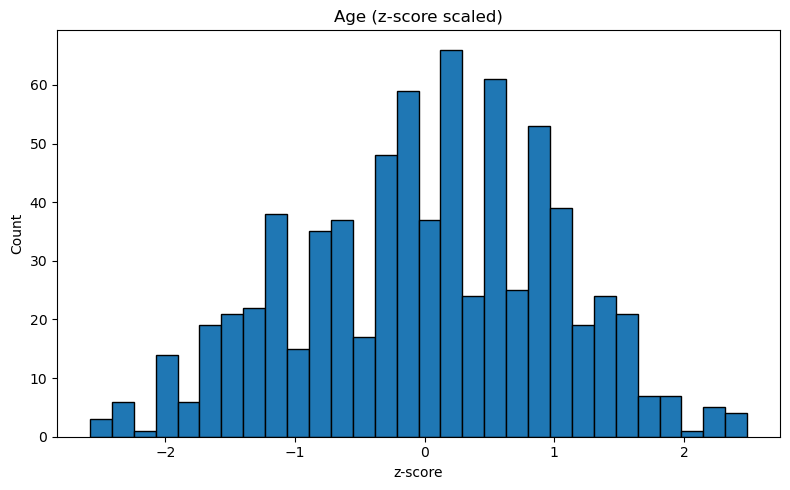

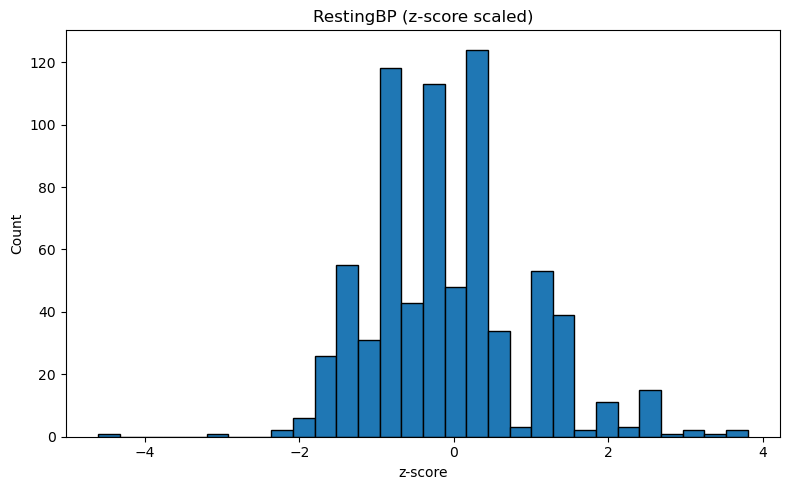

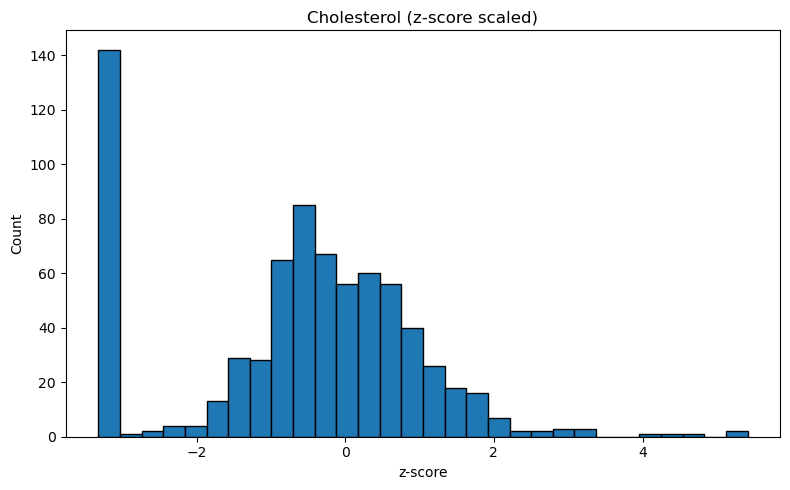

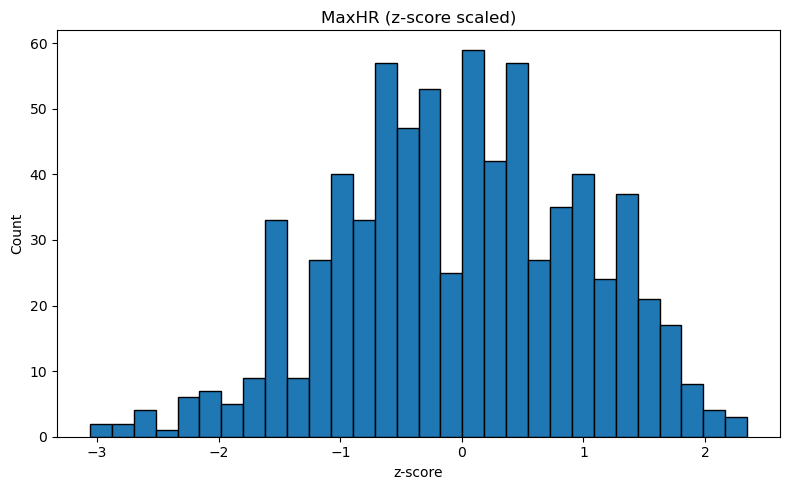

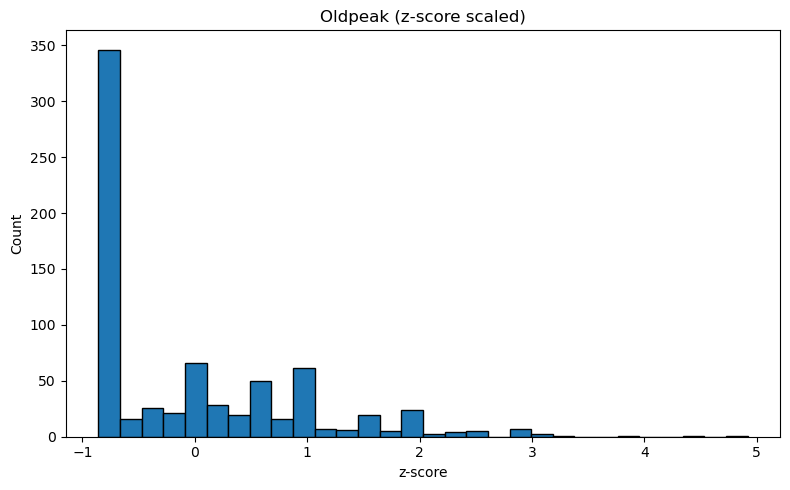

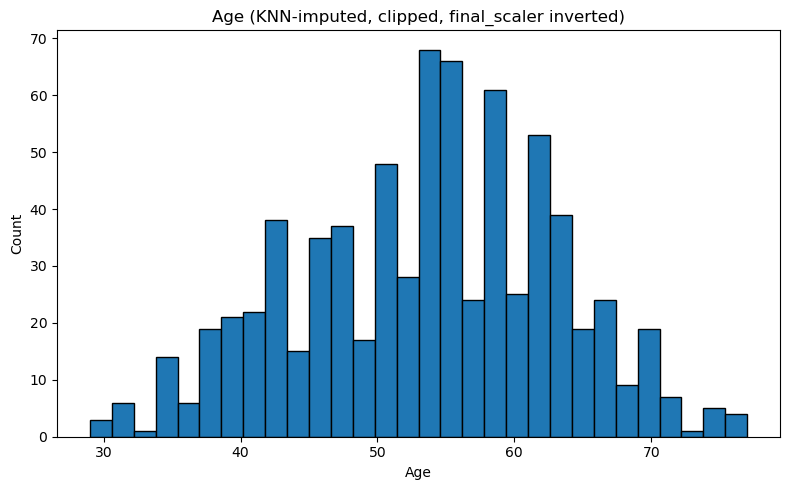

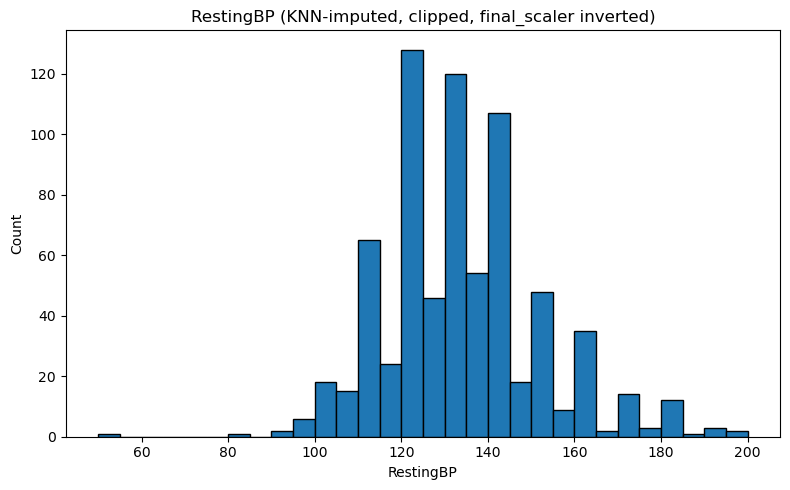

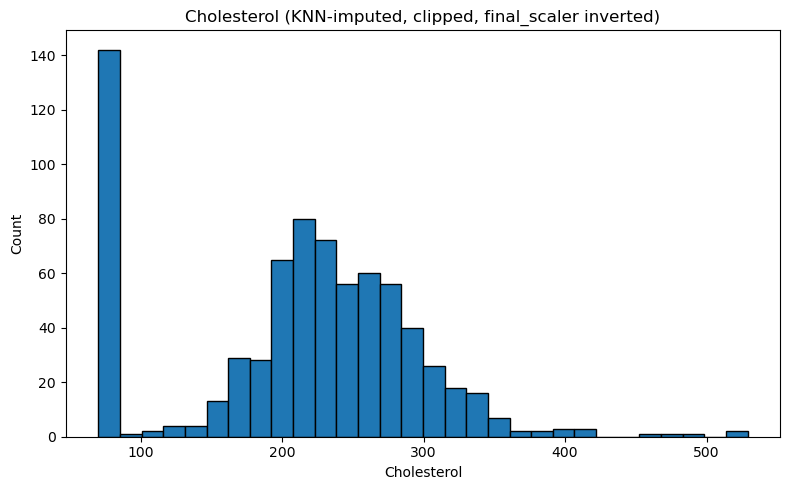

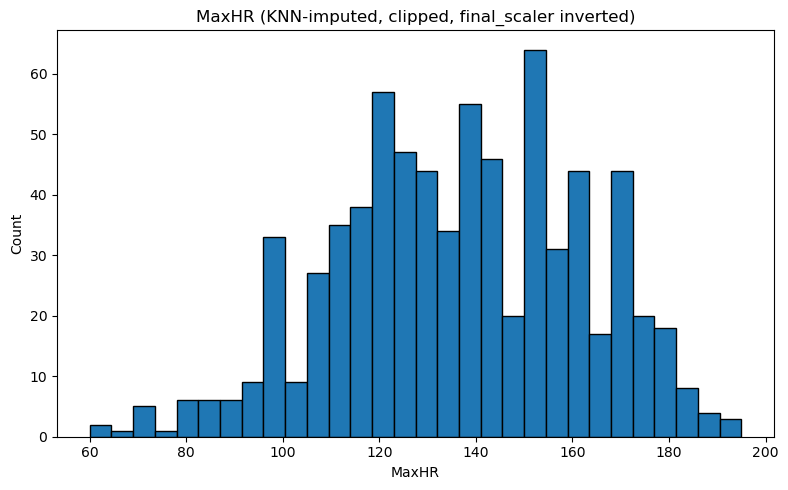

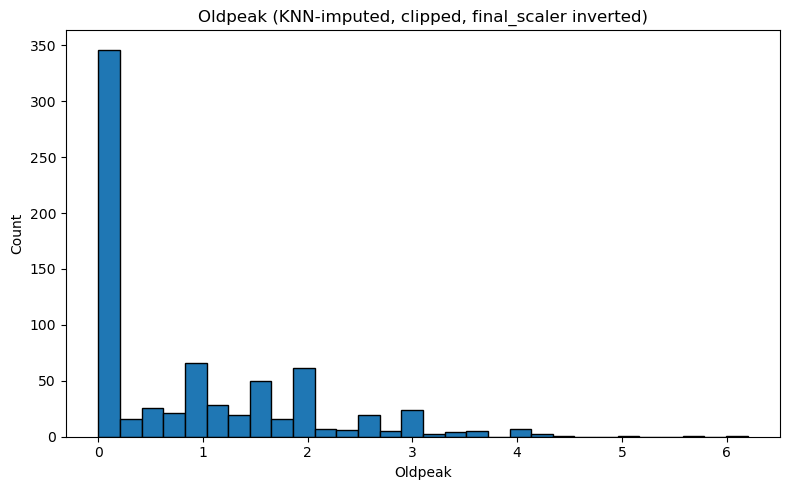

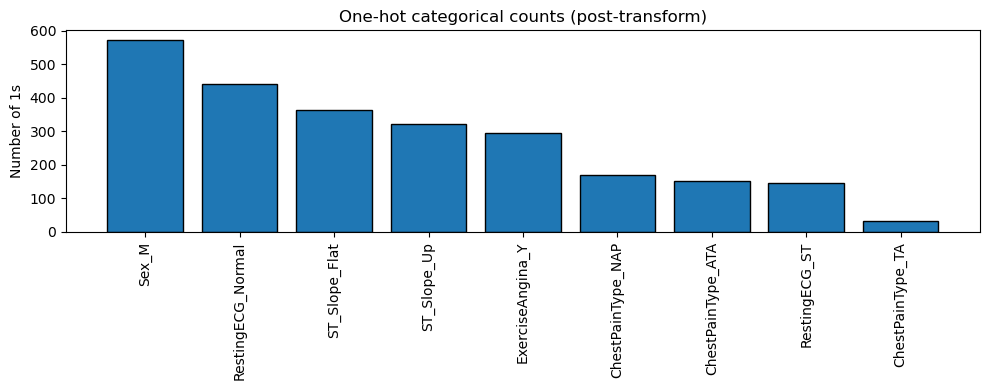

Scaled histograms saved   → Q1 FIGURES/POST-IMPUTATIONS\scaled
Un‑scaled histograms saved → Q1 FIGURES/POST-IMPUTATIONS\unscaled
One‑hot bar chart saved    → Q1 FIGURES/POST-IMPUTATIONS/onehot_counts.png


In [5]:
# ----------------------------------------------------------
# POST‑TRANSFORMATION EDA
#   • Saves BOTH scaled (z‑score) and "unscaled" histograms
#   • Displays each plot in the notebook as it is created
# ----------------------------------------------------------
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RAW_CSV   = "train_val_split.csv"
PREP_PATH = "preprocessor.pkl"

BASE_DIR     = "Q1 FIGURES/POST-IMPUTATIONS"
SCALED_DIR   = os.path.join(BASE_DIR, "scaled")
UNSCALED_DIR = os.path.join(BASE_DIR, "unscaled")

for directory in (BASE_DIR, SCALED_DIR, UNSCALED_DIR):
    os.makedirs(directory, exist_ok=True)

# 1) Load raw data + fitted pipeline ("preprocessor.pkl")
df_raw = pd.read_csv(RAW_CSV)
pre    = joblib.load(PREP_PATH)  # This is the pipeline from Q1.3

# 2) Transform all features (dropping the target column)
X_scaled = pre.transform(df_raw.drop(columns=["HeartDisease"]))

# 3) Determine final column names
#    - numeric columns come from the ColumnTransformer's "num" step
num_cols = pre.transformers_[0][2]  # e.g. ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

#    - categorical columns come from the one-hot step
onehot = pre.named_transformers_["cat"].named_steps["onehot"]
cat_cols = onehot.get_feature_names_out(
    ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
)
all_cols = np.concatenate([num_cols, cat_cols])

df_scaled = pd.DataFrame(X_scaled, columns=all_cols)

# --- Inverse-transform the final scaler for numeric features only ---
# NOTE: The numeric pipeline is [("knn_bounds", KNNAndScaledBounds), ("final_scaler", StandardScaler())].
#       We want to invert the 'final_scaler' step to get approximate real units.
final_scaler = pre.named_transformers_["num"].named_steps["final_scaler"]
X_num_unscaled = final_scaler.inverse_transform(df_scaled[num_cols])
df_unscaled    = pd.DataFrame(X_num_unscaled, columns=num_cols)

# ---------------------------------------------------
# 4) Histograms – scaled z‑scores
# ---------------------------------------------------
for col in num_cols:
    plt.figure()
    plt.hist(df_scaled[col], bins=30, edgecolor="black")
    plt.title(f"{col} (z‑score scaled)")
    plt.xlabel("z‑score")
    plt.ylabel("Count")
    plt.tight_layout()
    fname = f"{SCALED_DIR}/hist_{col}_scaled.png"
    plt.savefig(fname, dpi=120)
    plt.show()
    plt.close()

# ---------------------------------------------------
# 5) Histograms – "unscaled" (only final_scaler undone)
# ---------------------------------------------------
for col in num_cols:
    plt.figure()
    plt.hist(df_unscaled[col], bins=30, edgecolor="black")
    plt.title(f"{col} (KNN-imputed, clipped, final_scaler inverted)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    fname = f"{UNSCALED_DIR}/hist_{col}_unscaled.png"
    plt.savefig(fname, dpi=120)
    plt.show()
    plt.close()

# ---------------------------------------------------
# 6) One‑hot dummy counts (identical in scaled vs. unscaled)
# ---------------------------------------------------
cat_counts = df_scaled[cat_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(cat_counts.index, cat_counts.values, edgecolor="black")
plt.title("One‑hot categorical counts (post‑transform)")
plt.ylabel("Number of 1s")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{BASE_DIR}/onehot_counts.png", dpi=120)
plt.show()
plt.close()

print(f"Scaled histograms saved   → {SCALED_DIR}")
print(f"Un‑scaled histograms saved → {UNSCALED_DIR}")
print(f"One‑hot bar chart saved    → {BASE_DIR}/onehot_counts.png")